# Visualizing result

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers import isinmask, isinmask_smooth

In [2]:
kappa_sub = np.load('files/kappa_sub.npy')

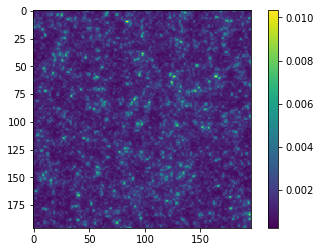

In [3]:
plt.imshow(kappa_sub)
plt.colorbar()

In [73]:
kappa = np.load('files/kappa_intreal_ext0.8_theta0.7.npy')

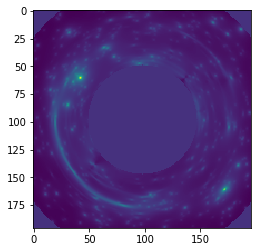

In [75]:
plt.imshow(kappa * mymask)

In [38]:
mymask = np.zeros((196,196))
for xpix in range(196):
    for ypix in range(196):
        mymask[xpix, ypix] = 1 if isinmask(xpix, ypix, 7, 3, 16/196, 196) else 0

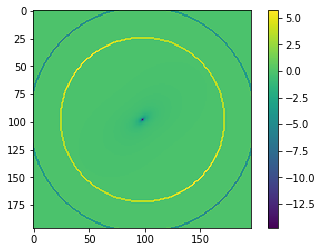

In [71]:
plt.imshow(kappa)
plt.colorbar()

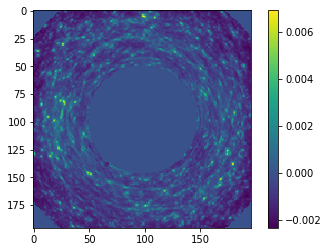

In [40]:
plt.imshow(kappa * mymask)
plt.colorbar()

In [64]:
mask_smooth = np.zeros((196,196))
for xpix in range(196):
    for ypix in range(196):
        mask_smooth[xpix, ypix] = isinmask_smooth(xpix, ypix, 7, 1, 16/196, 196)

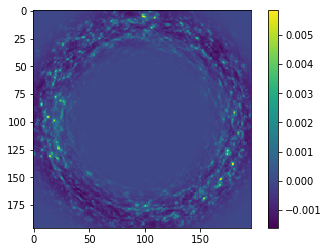

In [65]:
plt.imshow(kappa * mask_smooth)
plt.colorbar()

In [68]:
#np.save('files/kappa_masked_intreal_ext8_theta7.npy', kappa * mask_smooth * mymask)

In [69]:
np.sum(mask_smooth) / (196**2)

0.3963046393675159

# Load in partial results

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mydico = {}
with open('files/full_raw.txt', 'r') as f:
    for line in f:
        line_number = int(line.split()[2])
        mydico[line_number] = eval(' '.join(line.split()[3:]))

pixnum = 200
alphamat_x = []
alphamat_y = []

for xpix in range(pixnum):
    alphamat_x.append(mydico[xpix][0])
    alphamat_y.append(mydico[xpix][1])
    
alphamat_x = np.array(alphamat_x)
alphamat_y = np.array(alphamat_y)

In [3]:
str(line_numbers)

'[199, 47, 198, 46, 197, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 33, 34, 32, 30, 28, 29, 27, 26, 25, 24, 22, 19, 21, 20, 18, 17, 16, 15, 13, 10, 11, 3, 14, 6, 9, 7, 8, 2, 12, 5, 0, 1, 4, 75, 101, 53, 49, 62, 65, 100, 80, 45, 56, 99, 81, 98, 52, 96, 73, 58, 90, 79, 59, 78, 60, 31, 103, 77, 51, 55, 54, 70, 89, 66, 107, 68, 67, 23, 72, 57, 104, 85, 91, 88, 71, 93, 82, 102, 48, 76, 50, 87, 86, 61, 108, 92, 97, 84, 63, 105, 69, 74, 95, 106, 64, 94, 83, 113, 111, 145, 117, 122, 115, 135, 119, 137, 134, 136, 109, 110, 118, 129, 126, 132, 144, 116, 112, 123, 166, 125, 131, 183, 114, 186, 121, 142, 141, 138, 139, 128, 127, 133, 140, 178, 120, 168, 143, 124, 189]'

In [4]:
len(line_numbers)

154

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kappa_intnaive = np.load('files/kappa_intnaive.npy')

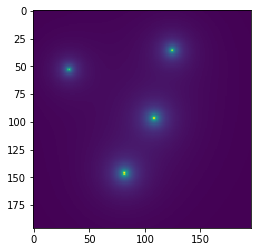

In [4]:
plt.imshow(kappa_intnaive)

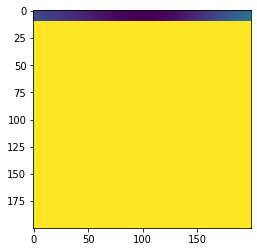

In [15]:
alphamat_x = np.load('files/tmp_alphax_ext8.0_theta7.npy')
plt.imshow(alphamat_x)

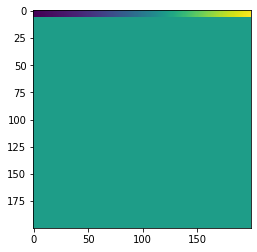

In [9]:
alphamat_y = np.load('files/tmp_alphay_ext8.0_theta7.npy')
plt.imshow(alphamat_y)

In [11]:
alphamat_y[:,0]

array([-5.29519677, -5.31344619, -5.33173053, -5.35006407, -5.36849459,
       -5.38700862,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [2]:
25/.8

31.25

# Single-plane test
2 Mar 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers import CustomImage, CustomImageSinglePlane

In [2]:
zl = .5
zs = 1

In [3]:
xs = np.random.uniform(-.8,.8,50)
ys = np.random.uniform(-.8,.8,50)

In [4]:
myimg = CustomImage(xs,ys, [zl for _ in range(len(xs))], zl=zl, zs=zs, main_theta=.3, pixsize=.008)

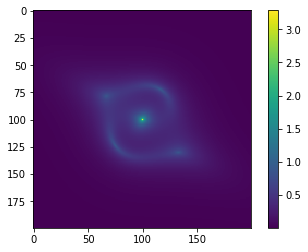

In [8]:
plt.imshow(myimg.image)
plt.colorbar()

In [10]:
%%time
myimg.calc_div_curl_5pt()

CPU times: user 1min 34s, sys: 36 ms, total: 1min 34s
Wall time: 1min 34s


(array([[0.19272793, 0.19370383, 0.19470433, ..., 0.37544466, 0.37392612,
         0.37239334],
        [0.19386559, 0.19485169, 0.19586227, ..., 0.37785818, 0.37629342,
         0.37471488],
        [0.19501222, 0.19600751, 0.1970267 , ..., 0.3802755 , 0.37866355,
         0.37703831],
        ...,
        [0.37880884, 0.38058421, 0.38235393, ..., 0.19793984, 0.19701319,
         0.19609525],
        [0.37645093, 0.37816574, 0.37987221, ..., 0.19675163, 0.1958356 ,
         0.19492814],
        [0.3740984 , 0.37575568, 0.37740265, ..., 0.1955778 , 0.19467218,
         0.19377501]]),
 array([[ 1.33816570e-09,  2.21099644e-09,  3.67484629e-09, ...,
         -7.85722182e-10, -7.05808133e-10, -6.27294549e-10],
        [ 7.64212651e-09,  1.19050059e-08,  1.89898837e-08, ...,
         -7.55169039e-10, -6.69993005e-10, -5.87051241e-10],
        [ 1.28459211e-08,  1.97063650e-08,  3.09334156e-08, ...,
         -7.20407539e-10, -6.29846869e-10, -5.42424856e-10],
        ...,
        [ 4.423071

In [6]:
myimg = CustomImageSinglePlane(xs,ys, zl=zl, zs=zs, main_theta=.3, pixsize=.008)

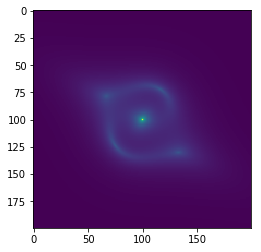

In [7]:
plt.imshow(myimg.image)

In [9]:
%%time
myimg.calc_div_curl_5pt()

CPU times: user 1min 49s, sys: 68 ms, total: 1min 49s
Wall time: 1min 49s


(array([[0.19249783, 0.19341061, 0.1943319 , ..., 0.37555872, 0.37403611,
         0.37249933],
        [0.19368514, 0.19461321, 0.19555034, ..., 0.37797783, 0.37640858,
         0.37482563],
        [0.19489125, 0.19583568, 0.19678988, ..., 0.38040097, 0.37878407,
         0.37715399],
        ...,
        [0.37769738, 0.37938099, 0.38105246, ..., 0.19950354, 0.19854738,
         0.19759227],
        [0.37541708, 0.37705346, 0.37867717, ..., 0.19818954, 0.19723523,
         0.19628619],
        [0.3731371 , 0.37472719, 0.3763041 , ..., 0.19691132, 0.19596133,
         0.19501954]]),
 array([[ 2.87609057e-09,  4.51871064e-09,  6.92075447e-09, ...,
         -7.14633214e-10, -6.33035264e-10, -5.54734535e-10],
        [ 1.99024824e-09,  3.74099363e-09,  6.61062408e-09, ...,
         -6.40994202e-10, -5.60902019e-10, -4.83869861e-10],
        [ 3.80280321e-10,  1.95295630e-09,  5.06606793e-09, ...,
         -5.60382714e-10, -4.82475171e-10, -4.07143069e-10],
        ...,
        [-4.330748

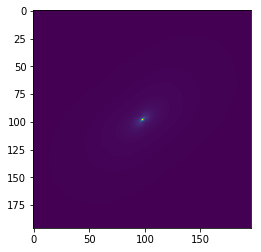

In [10]:
plt.imshow(myimg.divmat)

---

In [1]:
2e-6 * 2.52e7**1.9

231042046.70972994

In [2]:
.012 * 1e8**.9

190187.18309533372

---

In [1]:
398/9.7**2

4.229992560314593

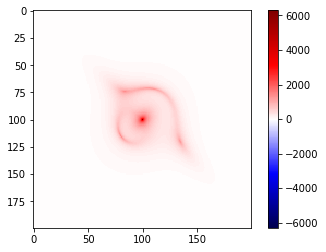

In [4]:
from helpers import CustomImage, autoshow

blankimg = CustomImage([],[],[], zl=0.5, pixnum=200, pixsize=.008*40)

autoshow(blankimg.image)

In [1]:
from helpers import CustomImage, autoshow

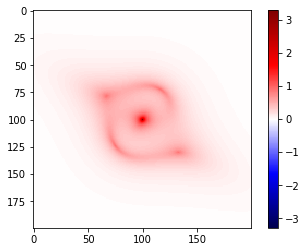

In [2]:
blankimg = CustomImage([],[],[], zl=0.5, pixnum=200, pixsize=.008)

autoshow(blankimg.image)

In [1]:
mylist = [1,3,3,7]
{z:0 for z in mylist}

{1: 0, 3: 0, 7: 0}

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.316)
cosmo.comoving_distance(0.5)

<Quantity 1878.26610075 Mpc>

In [5]:
cosmo.angular_diameter_distance_z1z2(0.1, 0.5)

<Quantity 973.54021907 Mpc>

# Test PSO

18 November 2019

In [12]:
# Import modules
import numpy as np

# Import PySwarms (pip install pyswarms pyyaml)
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [14]:

%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)



2019-11-18 21:57:03,565 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3.76e-44
2019-11-18 21:57:04,672 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.763289322434694e-44, best pos: [-1.29161489e-22 -1.44741850e-22]


CPU times: user 1.17 s, sys: 136 ms, total: 1.3 s
Wall time: 1.11 s


In [15]:
cost

3.763289322434694e-44

In [16]:
pos

array([-1.29161489e-22, -1.44741850e-22])

In [17]:
# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
def rosenbrock_with_args(x, a, b, c=0):
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f

In [18]:
cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, a=1, b=100, c=0)

2019-11-18 21:59:05,354 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3.76e-44
2019-11-18 21:59:06,469 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.763289322434694e-44, best pos: [4.21758234e-15 7.38154598e-23]


In [19]:
cost, pos

(3.763289322434694e-44, array([4.21758234e-15, 7.38154598e-23]))

# Dynesty test

18 November 2019

From the crash course at [this site](https://dynesty.readthedocs.io/en/latest/crashcourse.html#crash-course).

In [ ]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 3

# Define our 3-D correlated multivariate normal likelihood.
C = np.identity(ndim)  # set covariance to identity matrix
C[C==0] = 0.95  # set off-diagonal terms
Cinv = np.linalg.inv(C)  # define the inverse (i.e. the precision matrix)
lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
                np.log(np.linalg.det(C)))  # ln(normalization)

# Is the lnorm important? I hope not...

def loglike(x):
    """The log-likelihood function."""

    return -0.5 * np.dot(x, np.dot(Cinv, x)) + lnorm

# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return 10. * (2. * u - 1.)

Estimate evidence and posterior:

In [ ]:
import dynesty

# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim)
sampler.run_nested()
sresults = sampler.results

# "Dynamic" nested sampling.
dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim)
dsampler.run_nested()
dresults = dsampler.results

Combine static and dynamic results:

In [ ]:
from dynesty import utils as dyfunc

# Combine results from "Static" and "Dynamic" runs.
results = dyfunc.merge_runs([sresults, dresults])

Plotting:

In [ ]:
%matplotlib inline

In [ ]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

Post-processing:

In [ ]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = np.exp(results.logwt - results.logz[-1])  # normalized weights

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = dyfunc.resample_equal(samples, weights)

# Generate a new set of results with statistical+sampling uncertainties.
results_sim = dyfunc.simulate_run(results)

# Test emcee parallelization

17 November 2019

In [ ]:
import time
import numpy as np


def log_prob(theta):
    t = time.time() + np.random.uniform(0.005, 0.008)
    while True:
        if time.time() >= t:
            break
    return -0.5 * np.sum(theta ** 2)

In [ ]:
import emcee

np.random.seed(42)
initial = np.random.randn(32, 5)
nwalkers, ndim = initial.shape
nsteps = 100

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

In [ ]:
%%time
sampler.run_mcmc(initial, nsteps);

In [ ]:
from multiprocessing import Pool

In [ ]:
%%time
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, pool=pool)

    state = sampler.run_mcmc(initial, nsteps)

Wow! I should have done this so much sooner!

In [ ]:
%%time
with Pool() as pool:
    new_sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, pool=pool)
    
    new_sampler.run_mcmc(state, nsteps)